In [1]:
from generator import Pattern_generator, pattern_mixer, get_pulse_list, day_list_2_end_start_tuple_list

In [2]:
import timesynth as ts
import numpy as np
import math
import matplotlib
#matplotlib.use('agg')
import matplotlib.pyplot as plt
import random
%matplotlib inline

# PG1 = Pattern_generator(stop_time=10, period=24, amplitude=10, std=1, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
# #PG1.plot()
# #PG1.plot(False)
# print(PG1.series_length)
# print(PG1.stop_time)
# print(PG1.get_smooth_values())
# ptl = [(2000,4000),(5000,6000)]
# ml = [3,-2]
# PG1.move(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = True)
# PG1.plot()
# PG1.plot(False)
# PG1.move(position_tuple_list = ptl, magnitude_list = ml, bump_the_smoother_line = False)
# PG1.plot()
# PG1.plot(False)

In [3]:
# GENERAL ASSUMPTION
window_size = 192
period_length = 24
N = 12500
n_periods_per_window = window_size // period_length
time_series_length = window_size * N
amp = 1
std = 0.1
BASE_PATTERN = Pattern_generator(stop_time=time_series_length, period=24, amplitude=amp/2, std=std, ftype = np.sin, signal_type = ts.signals.Sinusoidal)
# BASE_PATTERN.move_to_above_zero()
# BASE_PATTERN.plot()

# DATASET NO. 1
# Potential Usage: (TBA) testing and prediction? 对照组？
# 随机选择1%的数据长度，放入起伏，对于放入位置没有过多要求 （不overlap即可），需有长短不一（短，中，长）的起伏持续长度。
# 起伏的振幅与正常周期函数相同，即，起伏处(此时可以理解为异常)为正常峰值的两倍左右。


In [4]:
# ===> 设计 hours_in_day, days_in_week, days_in_month 三种起伏，每种各三个类似
    
n = 3 # num_choice_for_each_pattern
# hours_in_day pattern
hd_len_mean = 9
hd_len_std = 2
hd_pattern_list = get_pulse_list(num=n, length_mean=hd_len_mean, length_std=hd_len_std, amplitude=amp, verbose=False, plot_the_smoother_line=True)
# hd_pattern_list = get_pulse_list(num=n, length_mean=hd_len_mean, length_std=hd_len_std, amplitude=amp, verbose=True, plot_the_smoother_line=True)

# days_in_week pattern
# weekday bump up
dw_stop_time = 5*24
dw_period = 24
dw_amp = 0.1
dw_std = 0.1
dw_bump_extent = 3
dw_pattern_list = []
for i in range(n):
    dw_pattern_list.append(Pattern_generator(stop_time=dw_stop_time, period=dw_period, amplitude=dw_amp, std=dw_std, ftype = np.sin, signal_type = ts.signals.Sinusoidal))
    dw_pattern_list[i].move_all(bump_extent = dw_bump_extent)
#     dw_pattern_list[i].plot()
#     dw_pattern_list[i].plot(False)

# days_in_month pattern
dm_stop_time = 2*24
dm_period = 24
dm_amp = 0.1
dm_std = 0.1
dm_bump_extent = 10
dm_pattern_list = []
for i in range(n):
    dm_pattern_list.append(Pattern_generator(stop_time=dm_stop_time, period=dm_period, amplitude=dm_amp, std=dm_std, ftype = np.sin, signal_type = ts.signals.Sinusoidal))
    dm_pattern_list[i].move_all(bump_extent = dm_bump_extent)
#     dm_pattern_list[i].plot()
#     dm_pattern_list[i].plot(False)


In [5]:
# ===> hours_in_day, days_in_week, days_in_month 三种起伏的对应位置

# hour_in_day: 7-22
# days_in_week: Mon-Fri, fixed
# days_in_month: (assumption: all 28 days per month) 23-28

hd_position_list = []
for i in range(time_series_length // 24):
    hd_position_list.append((i*24+7,i*24+22))
# print(hd_position_list)

dw_position_list = []
for i in range(time_series_length // 24 // 7):
    dw_position_list.append((i*24*7+0*24, i*24*7+5*24))
# print(dw_position_list)

dm_position_list = []
for i in range(time_series_length // 24 // 28):
    dm_position_list.append((i*24*28+23*24, i*24*28+28*24))
# print(dm_position_list)


In [6]:
num_hd_patterns = len(hd_position_list)
num_dw_patterns = len(dw_position_list)
num_dm_patterns = len(dm_position_list)

random.shuffle(hd_position_list)
random.shuffle(dw_position_list)
random.shuffle(dm_position_list)

hd_range = num_hd_patterns // n
dw_range = num_dw_patterns // n
dm_range = num_dm_patterns // n

random_picked_pos_for_hd_list = [hd_position_list[i*hd_range:(i+1)*hd_range] for i in range(n)]
random_picked_pos_for_dw_list = [dw_position_list[i*dw_range:(i+1)*dw_range] for i in range(n)]
random_picked_pos_for_dm_list = [dm_position_list[i*dm_range:(i+1)*dm_range] for i in range(n)]

# print(random_picked_pos_for_hd_list)
# print(random_picked_pos_for_dw_list)
# print(random_picked_pos_for_dm_list)

# FINAL STEP YAY!
for i in range(n):
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = hd_pattern_list[i],  position_tuple_list = random_picked_pos_for_hd_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = hd_pattern_list[i],  position_tuple_list = random_picked_pos_for_hd_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dw_pattern_list[i],  position_tuple_list = random_picked_pos_for_dw_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dw_pattern_list[i],  position_tuple_list = random_picked_pos_for_dw_list[i], mix_the_smoother_lines = False)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dm_pattern_list[i],  position_tuple_list = random_picked_pos_for_dm_list[i], mix_the_smoother_lines = True)
    pattern_mixer(pattern_generator_1 = BASE_PATTERN, pattern_generator_2 = dm_pattern_list[i],  position_tuple_list = random_picked_pos_for_dm_list[i], mix_the_smoother_lines = False)

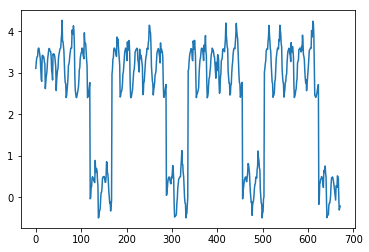

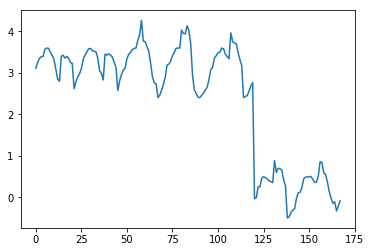

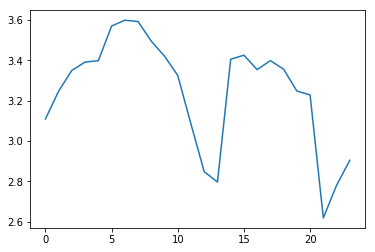

In [7]:
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*28)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24*7)
BASE_PATTERN.plot(plot_the_smoother_line = True, plot_till=24)
smooth_ys = BASE_PATTERN.get_smooth_values()
np.save('Dataset_2_normal.npy', smooth_ys)

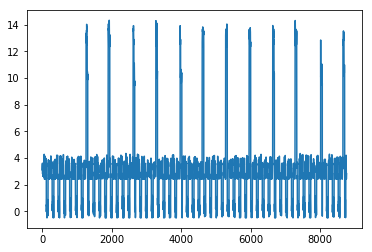

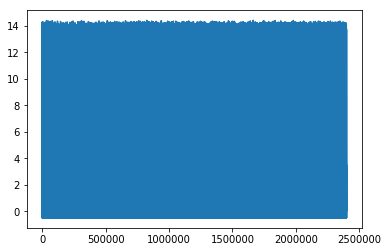

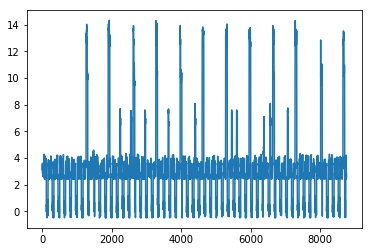

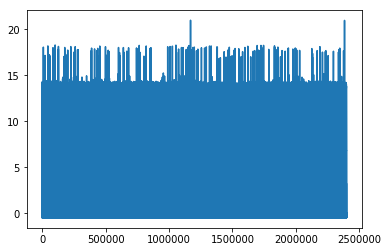

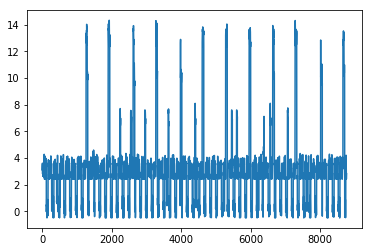

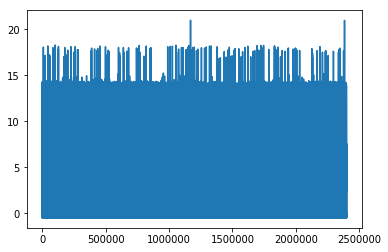

In [8]:
num_days = time_series_length // 24
num_random_holidays = int(15 / 365 * num_days)
population = list(range(time_series_length))
random_holidays = random.sample(population=list(range(num_days)),k = num_random_holidays)
holidays_peak = random_holidays[0::2]
holidays_dent = random_holidays[1::2]
# print(holidays_peak[:100])
# print(holidays_dent[:100])
# print(len(holidays_peak) + len(holidays_dent))
# print(smooth_ys[holidays_peak].shape)
# print(smooth_ys[holidays_dent].shape)
BASE_PATTERN.plot(plot_till=24*365)
BASE_PATTERN.plot()
holidays_peak_position_list = day_list_2_end_start_tuple_list(holidays_peak, morning_start_at = 0, night_end_at = 25 )
holidays_peak_magni_list = (np.ones(len(holidays_peak))*4).tolist()
BASE_PATTERN.move(position_tuple_list=holidays_peak_position_list, magnitude_list=holidays_peak_magni_list, bump_the_smoother_line = True, ramp_it = False)
BASE_PATTERN.move(position_tuple_list=holidays_peak_position_list, magnitude_list=holidays_peak_magni_list, bump_the_smoother_line = False, ramp_it = False)
BASE_PATTERN.plot(plot_till=24*365)
BASE_PATTERN.plot()
holidays_dent_position_list = day_list_2_end_start_tuple_list(holidays_dent, morning_start_at = 8, night_end_at = 17 )
holidays_dent_magni_list = (np.random.uniform(low=0.0, high=0.2, size=len(holidays_dent))).tolist()
BASE_PATTERN.multiply(position_tuple_list=holidays_dent_position_list, magnitude_list=holidays_dent_magni_list, bump_the_smoother_line = True, ramp_it = False)
BASE_PATTERN.multiply(position_tuple_list=holidays_dent_position_list, magnitude_list=holidays_dent_magni_list, bump_the_smoother_line = False, ramp_it = False)
BASE_PATTERN.plot(plot_till=24*365)
BASE_PATTERN.plot()


In [9]:
smooth_ys = BASE_PATTERN.get_smooth_values()
np.save('Dataset_2_with_holiday_impact.npy', smooth_ys)